In [ ]:
import pandas as pd

In [ ]:
# Import libraries, load data, and view import pandas as pd
url = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Kaggle-Challenge/main/data/weather/weatherAUS.csv"
weather = pd.read_csv(url)
weather.head()

# Drop columns with high-percentage of missing values (and the leaky feature)
cols_drop = ['Location', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RISK_MM']
weather_drop = weather.drop(cols_drop, axis=1)

# Convert the 'Date' column to datetime, extract month
weather_drop['Date'] = pd.to_datetime(weather_drop['Date'], infer_datetime_format=True).dt.month

In [ ]:
# Imports
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier


# Define the numeric features
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
                    'WindSpeed9am','WindSpeed3pm', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am','Pressure3pm',
                    'Temp9am', 'Temp3pm']

# Create the transformer (impute, scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define the categorical features
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())])

# Define how the numeric and categorical features will be transformed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the pipeline steps, including the classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', DecisionTreeClassifier())])

In [ ]:
# Create the feature matrix
X = weather_drop.drop('RainTomorrow', axis=1)

# Create and encode the target array
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y=label_enc.fit_transform(weather_drop['RainTomorrow'])

# Import the train_test_split utility
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train,y_train)
print('Validation Accuracy', clf.score(X_test, y_test))


Validation Accuracy 0.7665615141955836


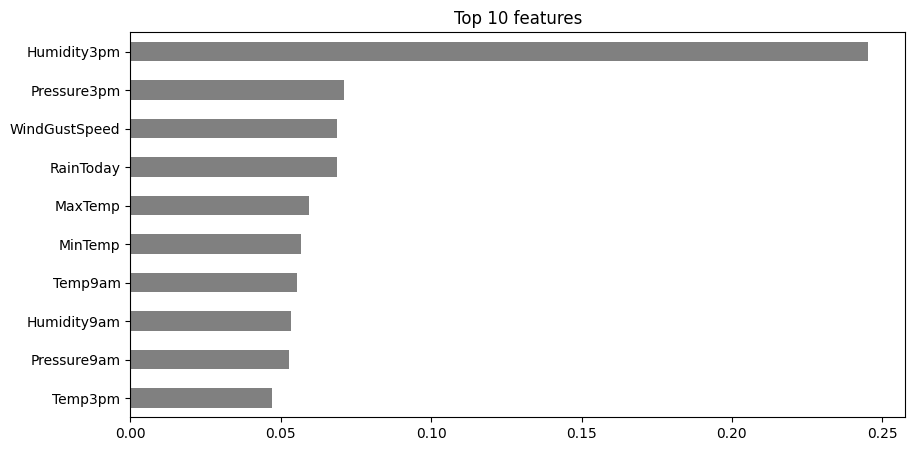

In [ ]:
# Features (order in which they were preprocessed)
features_order = numeric_features + categorical_features

importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

# Plot feature importances
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.show()

In [ ]:
# Permute the values in the more important column
feature = 'Humidity3pm'
X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  Humidity3pm
Validation Accuracy 0.7679891316862004
Validation Accuracy (permuted) 0.6710262727670451


In [ ]:
# Permute the values in the more important column
feature = 'WindSpeed3pm'
X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  WindSpeed3pm
Validation Accuracy 0.7679891316862004
Validation Accuracy (permuted) 0.7547951829422735


In [ ]:
# Load in libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Create X, y and training/test sets
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

# Import the classifier
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.5, random_state=42)
ada_classifier.fit(X_train,y_train)

print('Validation Accuracy: Adaboost', ada_classifier.score(X_test, y_test))


Validation Accuracy: Adaboost 0.9666666666666667


In [ ]:
# Load xgboost and fit the model
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(n_estimators=50, random_state=42, eval_metric='merror')

xg_classifier.fit(X_train,y_train)

print('Validation Accuracy: Adaboost', xg_classifier.score(X_test, y_test))

Validation Accuracy: Adaboost 0.9833333333333333
